In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bswrangler import *

In [4]:
df = pd.read_csv('aces_2020.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        2338 non-null   object 
 1   pitcher            2338 non-null   int64  
 2   game_date          2338 non-null   object 
 3   pitch_type         2338 non-null   object 
 4   pitch_name         2338 non-null   object 
 5   release_speed      2338 non-null   float64
 6   release_spin_rate  2338 non-null   float64
 7   events             2338 non-null   object 
 8   zone               2338 non-null   int64  
 9   release_pos_x      2338 non-null   float64
 10  release_pos_z      2338 non-null   float64
 11  pfx_x              2338 non-null   float64
 12  pfx_z              2338 non-null   float64
 13  plate_x            2338 non-null   float64
 14  plate_z            2338 non-null   float64
 15  release_extension  2338 non-null   float64
 16  vx0                2338 

In [6]:
(df.player_name[0], df.pitcher[0])

('Gerrit Cole', 543037)

In [7]:
(df.player_name[2222], df.pitcher[2222])

('Jacob deGrom', 594798)

In [8]:
cole = df[df.pitcher==543037]
degrom = df[df.pitcher==594798]

In [27]:
pitch_counts = list()
for df in [degrom, cole]:
    for pitch in ['FF','CU','SL','CH']:
        pitch_counts.append(sum(df[pitch]==1))
d_counts = pitch_counts[:4]
c_counts = pitch_counts[4:]
de_counts = pd.DataFrame(d_counts, columns=['degrom'], index=['FF','CU','SL','CH'])
co_counts = pd.DataFrame(c_counts, columns=['cole'], index=['FF','CU','SL','CH'])
pd.concat([de_counts, co_counts], axis=1)

,degrom,cole
FF,510,635
CU,30,207
SL,403,294
CH,192,67


In [ ]:
?.plot( 
    x = 'player_name', 
    kind = 'barh', 
    stacked = True, 
    title = 'Pitch frequencies', 
    mark_right = True) 

<AxesSubplot:title={'center':'Pitch frequencies'}, ylabel='player_name'>

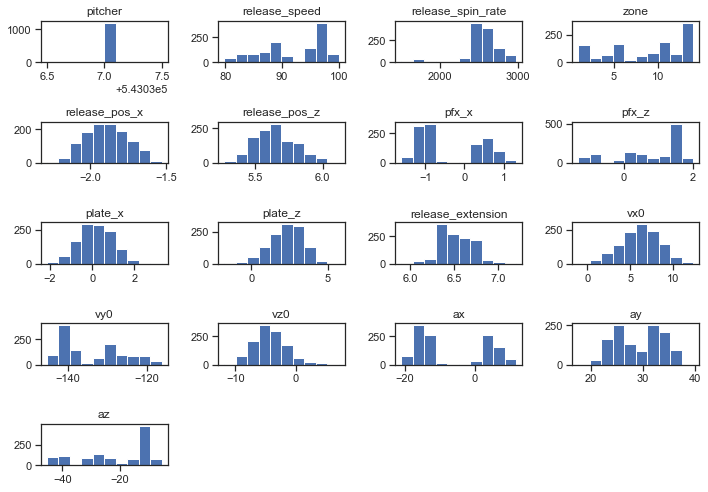

In [110]:
cole.hist(figsize=(10, 7), grid=False)
plt.tight_layout()

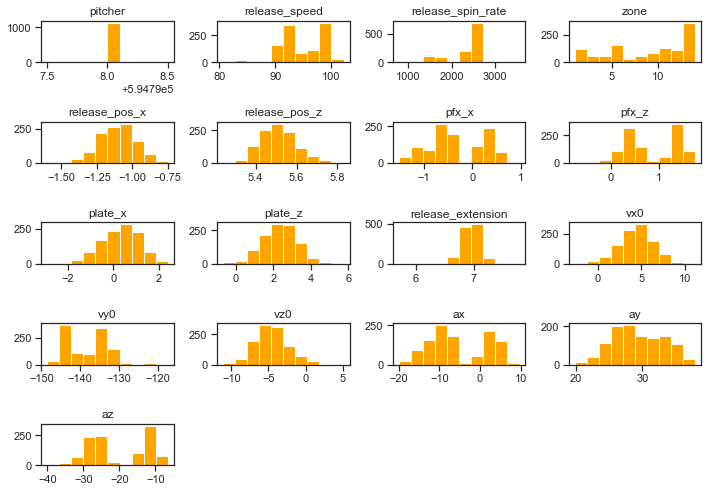

In [111]:
degrom.hist(figsize=(10, 7), grid=False, color='orange')
plt.tight_layout()

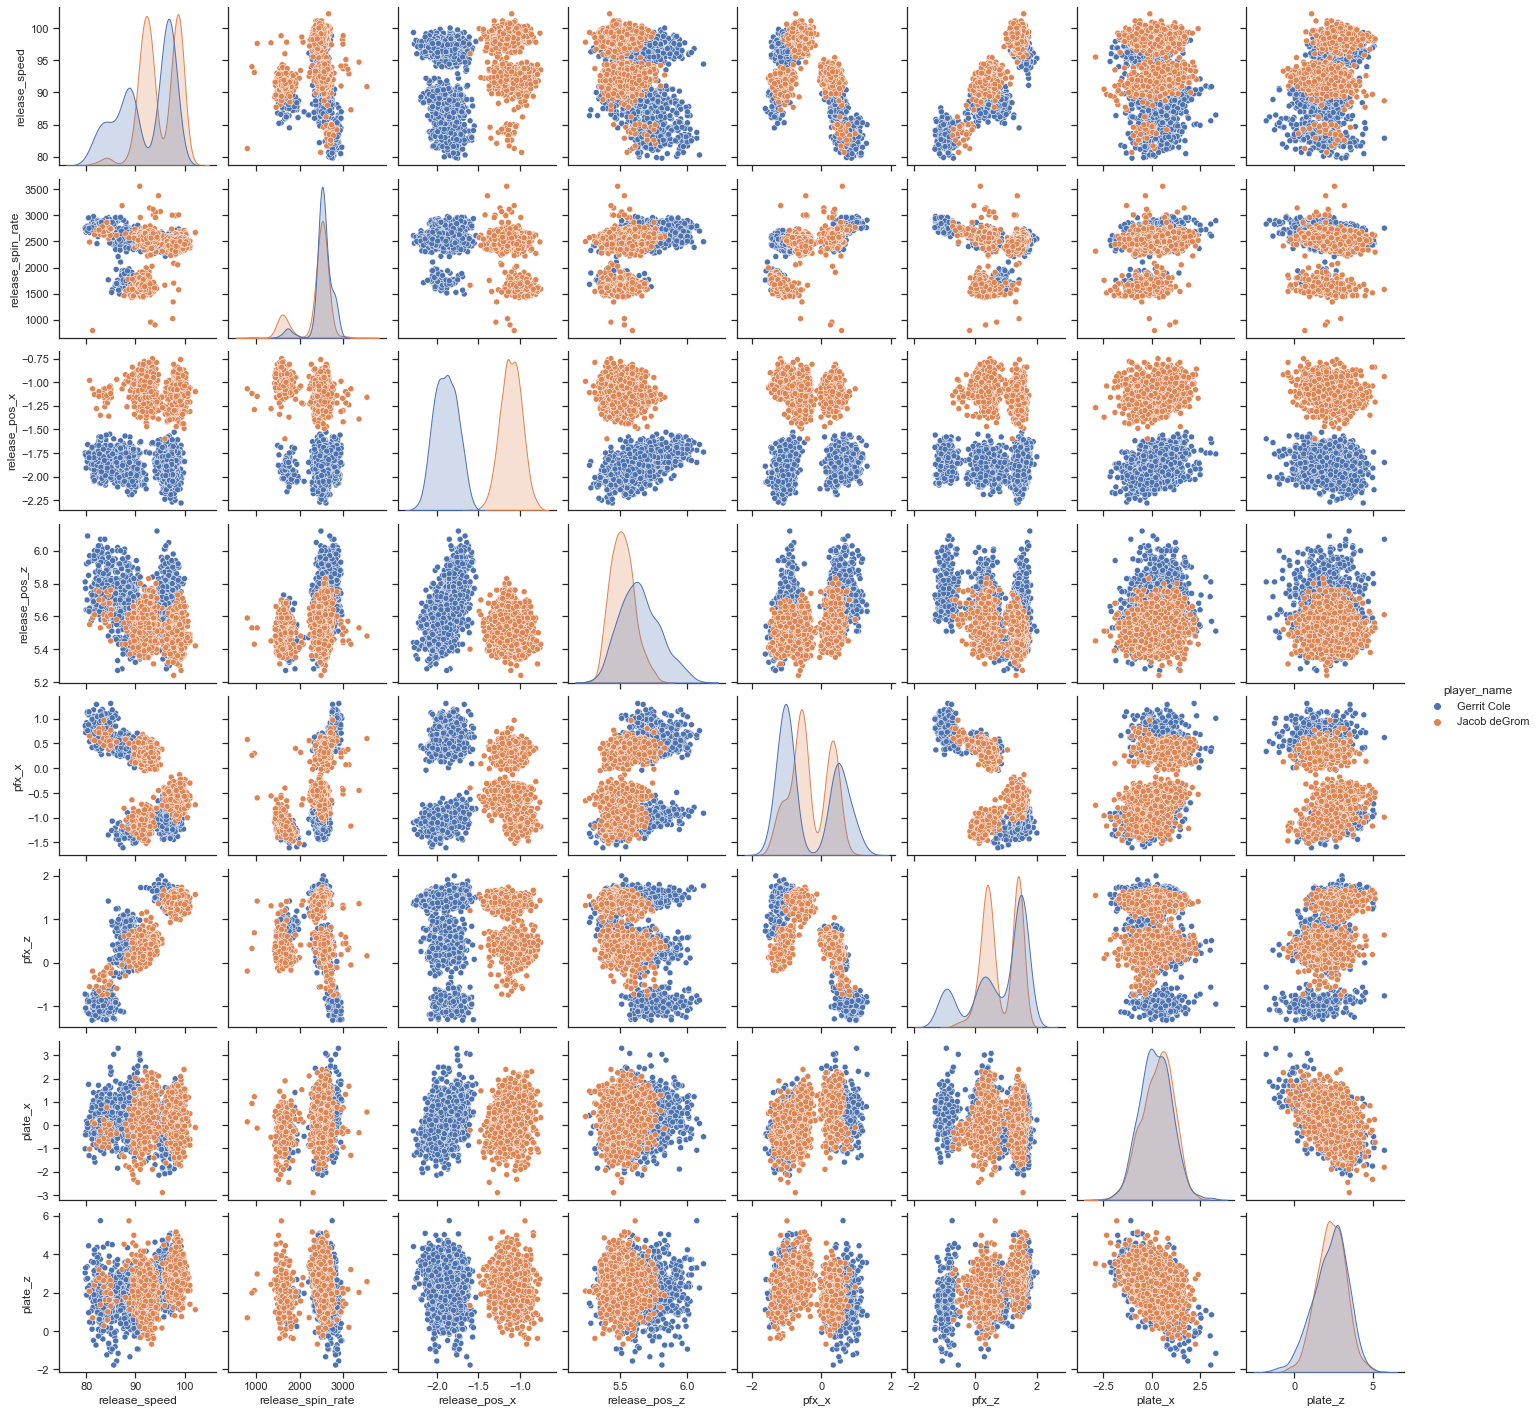

In [108]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(df[['player_name', 'release_speed',
                 'release_spin_rate', 'pitch_type',
                 'release_pos_x', 'release_pos_z',
                 'pfx_x', 'pfx_z', 'plate_x', 'plate_z']], hue='player_name');

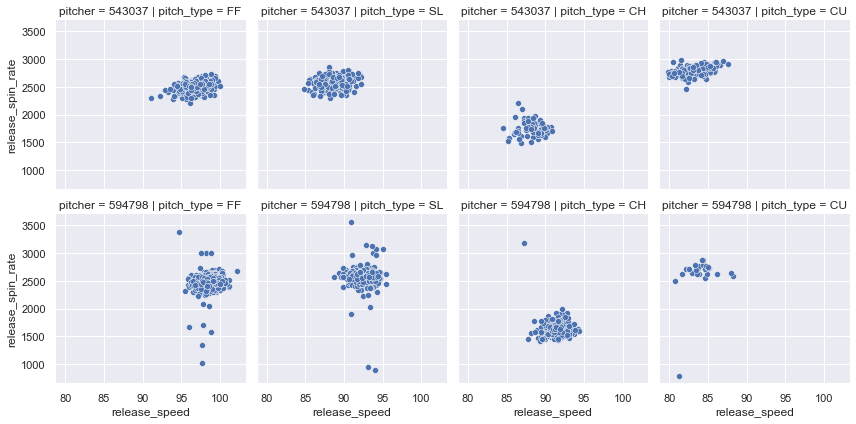

In [64]:
g=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
g.map(sns.scatterplot, 'release_speed', 'release_spin_rate');

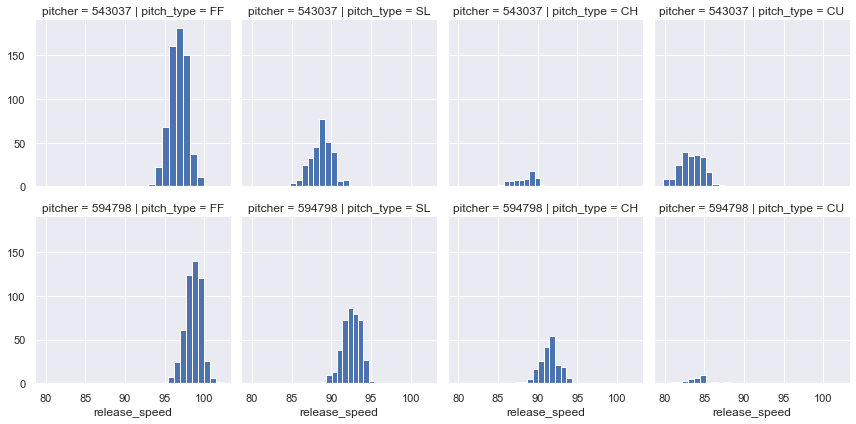

In [65]:
h=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
h.map(plt.hist, 'release_speed');

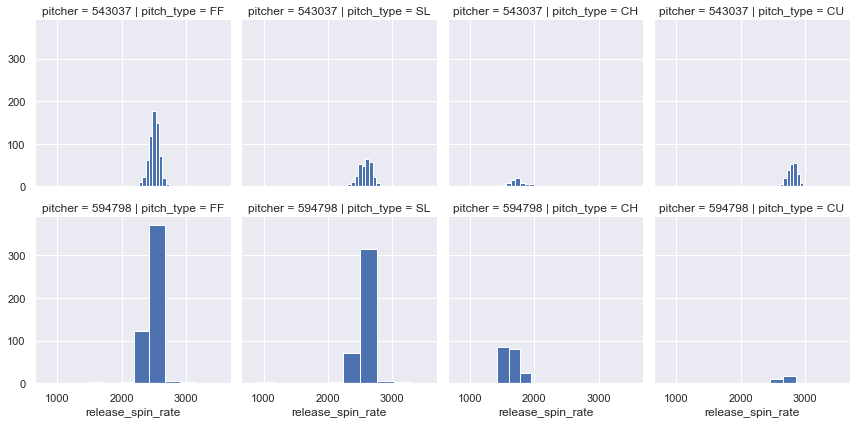

In [71]:
g=sns.FacetGrid(df, col='pitch_type', row='pitcher')
g.map(plt.hist, 'release_spin_rate');

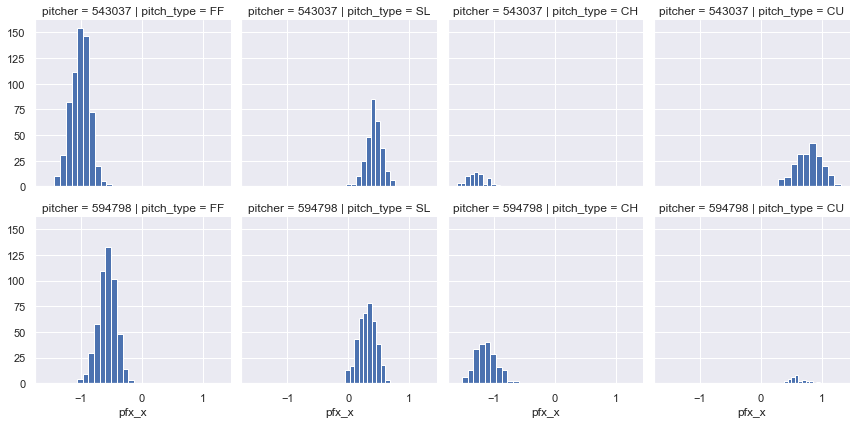

In [74]:
g=sns.FacetGrid(df, col='pitch_type', row='pitcher')
g.map(plt.hist, 'pfx_x');

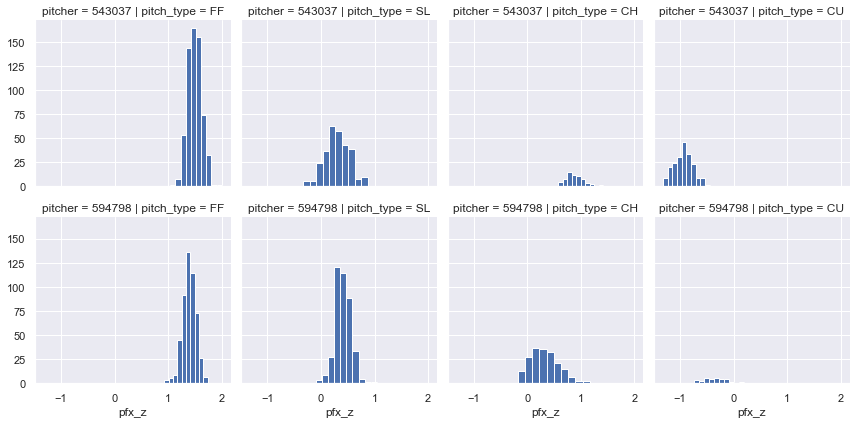

In [75]:
g=sns.FacetGrid(df, col='pitch_type', row='pitcher')
g.map(plt.hist, 'pfx_z');